In [1]:
!pip install keras
!pip install matplotlib

Epoch 1/10
235/235 [==============================] - 3s 10ms/step - loss: 0.6931 - accuracy: 0.0020 - val_loss: 0.6930 - val_accuracy: 0.0016
Epoch 2/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6930 - accuracy: 0.0018 - val_loss: 0.6930 - val_accuracy: 0.0016
Epoch 3/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6930 - accuracy: 0.0017 - val_loss: 0.6929 - val_accuracy: 0.0016
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6929 - accuracy: 0.0021 - val_loss: 0.6929 - val_accuracy: 0.0016
Epoch 5/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6929 - accuracy: 0.0018 - val_loss: 0.6928 - val_accuracy: 0.0016
Epoch 6/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6928 - accuracy: 0.0019 - val_loss: 0.6928 - val_accuracy: 0.0016
Epoch 7/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6928 - accuracy: 0.0018 - val_loss: 0.6927 - val_accuracy: 0.0016

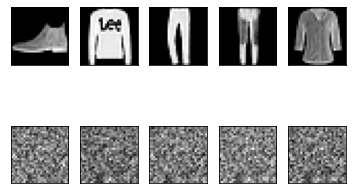

In [5]:
from keras.layers import Input, Dense
from keras import layers
from keras.models import Model
# this is the size of our encoded representations
encoding_dim = 32  
# 32 floats -> compression of factor 24.5, assuming the input is 784 floats
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(32, activation='relu')(input_img)
encoded = Dense(32, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
#encoder model
encoder = Model(input_img,encoded)

encoded_input = Input(shape=(encoding_dim,))
#deocder layer for each layer
decoder_layer = autoencoder.layers[-2](encoded_input)
decoder_layer = autoencoder.layers[-1](decoder_layer)
#decoder model
decoder = Model(encoded_input,decoder_layer)

# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
#fit the model
history = autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
#encode image
encoded_img = encoder.predict(x_test)
#decode images
decoded_img = decoder.predict(encoded_img)
#comapre original images and decoded images
import matplotlib.pyplot as plt=
n=5
for i in range(n):
  x = plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  x.get_xaxis().set_visible(False)
  x.get_yaxis().set_visible(False)

  x = plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_img[i].reshape(28,28))
  plt.gray()
  x.get_xaxis().set_visible(False)
  x.get_yaxis().set_visible(False)

plt.show()


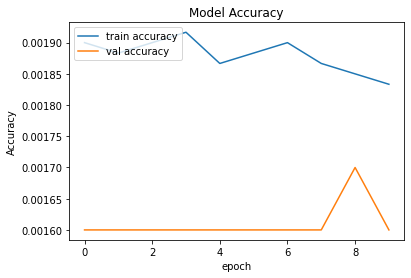

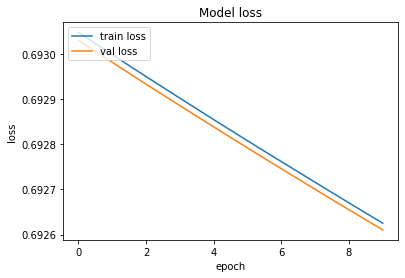

In [6]:
#plot train and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.title('Model Accuracy')
plt.legend(['train accuracy','val accuracy'], loc = 'upper left')
plt.show()
#plot train and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Model loss')
plt.legend(['train loss','val loss'], loc = 'upper left')
plt.show()